In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from matplotlib import style
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point
import geopandas as gpd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.colors
import plotly.express as px
import plotly.io as pio






In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)


In [43]:
skiresorts_pure = pd.read_csv('/Users/migueldefrutos/Documents/Bootcamp/Data_Bridge /Alumno /ds_thebridge_11_22/Entregas/EDA/Clean_Data/skiresort_pure.csv', index_col='Unnamed: 0')
skiresorts_pure.head()

,URL,Rate,NameResort,Stars,Km Freeride,Continent,Country,State/Province,Altitude,Easy,Intermediate,Difficult,Adult,Currency,Ski resort size,"Slope offering, variety of runs",Lifts and cable cars,Snow reliability,"Access, on-site parking","Orientation (trail map, information boards, sign-postings)",Cleanliness and hygiene,Environmentally friendly ski operation,"Mountain restaurants, ski huts, gastronomy",Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,Snow parks,Cross-country skiing and trails
0,http://www.skiresort.info/ski-resort/kitzski-k...,4.9,KitzSki – Kitzbühel/Kirchberg,5.0,45.0,Europe,Austria,Tyrol (Tirol),"2000,0","101,0","61,0","17,0",55,European Euro,"5,0","5,0","5,0","5,0","4,0","5,0","5,0","4,0","5,0","4,0","5,0","5,0","5,0","5,0","5,0"
1,http://www.skiresort.info/ski-resort/ischglsam...,4.8,Ischgl/Samnaun – Silvretta Arena,5.0,15.0,Europe,Austria,Tyrol (Tirol),"2872,0","47,0","142,0","49,0",53,European Euro,"5,0","5,0","5,0","5,0","4,0","5,0","5,0","4,0","5,0","5,0","5,0","4,0","4,0","5,0","4,0"
2,http://www.skiresort.info/ski-resort/skiwelt-w...,4.8,SkiWelt Wilder Kaiser-Brixental,5.0,26.0,Europe,Austria,Tyrol (Tirol),"1957,0","122,0","129,0","33,0",49,European Euro,"5,0","5,0","5,0","4,0","5,0","4,0","5,0","5,0","5,0","4,0","4,0","5,0","5,0","5,0","5,0"
3,http://www.skiresort.info/ski-resort/st-antons...,4.8,St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth...,5.0,200.0,Europe,Austria,Tyrol (Tirol),"2811,0","132,0","123,0","50,0",53,European Euro,"5,0","5,0","5,0","5,0","4,0","4,0","4,0","4,0","5,0","5,0","5,0","5,0","5,0","4,0","4,0"
4,http://www.skiresort.info/ski-resort/serfaus-f...,4.8,Serfaus-Fiss-Ladis,5.0,28.0,Europe,Austria,Tyrol (Tirol),"2820,0","47,0","123,0","28,0",51,European Euro,"5,0","5,0","5,0","5,0","4,0","5,0","4,0","4,0","5,0","4,0","4,0","5,0","4,0","5,0","4,0"


In [4]:
#Number of ski resort by country mundialy
skiresort_country = skiresorts_pure.groupby(['Continent','Country'])[['NameResort']].count().sort_values(by = 'NameResort',ascending=False)

In [5]:
#Analzio los pirncipales ski resort por pasi del mundo
skiresort_country['Percent'] = round((skiresort_country['NameResort']/skiresort_country['NameResort'].sum())*100,2)
print('Los 5 principales Paises del mundo reprentan el', skiresort_country['Percent'][0:5].sum(),'%')

Los 5 principales Paises del mundo reprentan el 47.53 %


In [6]:
skiresort_country.reset_index(inplace=True)

In [7]:
print('Europa respresenta el' ,skiresort_country[skiresort_country['Continent'] == 'Europe']['Percent'].sum().round(2), '%', 'frente al resto del Mundo')

Europa respresenta el 65.3 % frente al resto del Mundo


In [8]:
skiresort_continent = skiresort_country.groupby('Continent')['Percent'].sum()
skiresort_continent

Continent
Africa                    0.26
Asia                     16.63
Australia and Oceania     1.00
Europe                   65.30
North America            15.03
Russia                    1.04
South America             0.74
Name: Percent, dtype: float64

In [11]:
#Create a pie chart with suma of percent by Continent
continent = px.pie(skiresort_continent, values=skiresort_continent.values, names=skiresort_continent.index,color_discrete_sequence=px.colors.sequential.Blues)
continent.update_traces(textposition='inside', textinfo='percent+label',pull=[0, 0,0, 0,0,0,0,0,0,0,0,0,0])
continent.update_layout(title_text='Resorts by Countries', width=800,height=600)
continent.show()

## sacar el numero de ski resort que hay por continent como tabla

In [ ]:
#pio.write_html(continent, file='/Users/migueldefrutos/Documents/Bootcamp/Data_Bridge /Alumno /ds_thebridge_11_22/Entregas/EDA/SKI_EDA/img/chart.html', auto_open=True,include_plotlyjs='cdn')


In [64]:
skiresorts_pure['Easy'] = [float(x.replace(',','.')) for x in skiresorts_pure['Easy']]
skiresorts_pure['Intermediate '] = [float(x.replace(',','.')) for x in skiresorts_pure['Intermediate ']]
skiresorts_pure['Difficult'] = [float(x.replace(',','.')) for x in skiresorts_pure['Difficult']]

In [140]:
skiresorts_pure['Total Kms'] = skiresorts_pure.loc[:,'Easy':'Difficult'].sum(axis=1)
skiresorts_pure['Total Kms']

0       179.0
1       238.0
2       284.0
3       305.0
4       198.0
        ...  
5485      2.2
5486      0.0
5487      0.6
5488      7.0
5489      0.5
Name: Total Kms, Length: 5490, dtype: float64

In [149]:
kmsby_continent = skiresorts_pure.groupby('Continent')[['Easy','Intermediate ','Difficult','Total Kms']].sum().sort_values(by = 'Total Kms',ascending = False)
kmsby_continent

,Easy,Intermediate,Difficult,Total Kms
Continent,,,,
Europe,16217.4,16225.0,4761.2,37203.6
North America,3775.1,6291.6,5042.3,15109.0
Asia,1421.3,1544.5,799.6,3765.4
Australia and Oceania,186.0,420.5,233.5,840.0
South America,232.0,268.8,205.4,706.2
Russia,159.3,158.0,57.1,374.4
Africa,9.2,7.0,4.3,20.5


In [151]:
kmsby_continent.reset_index(inplace=True)

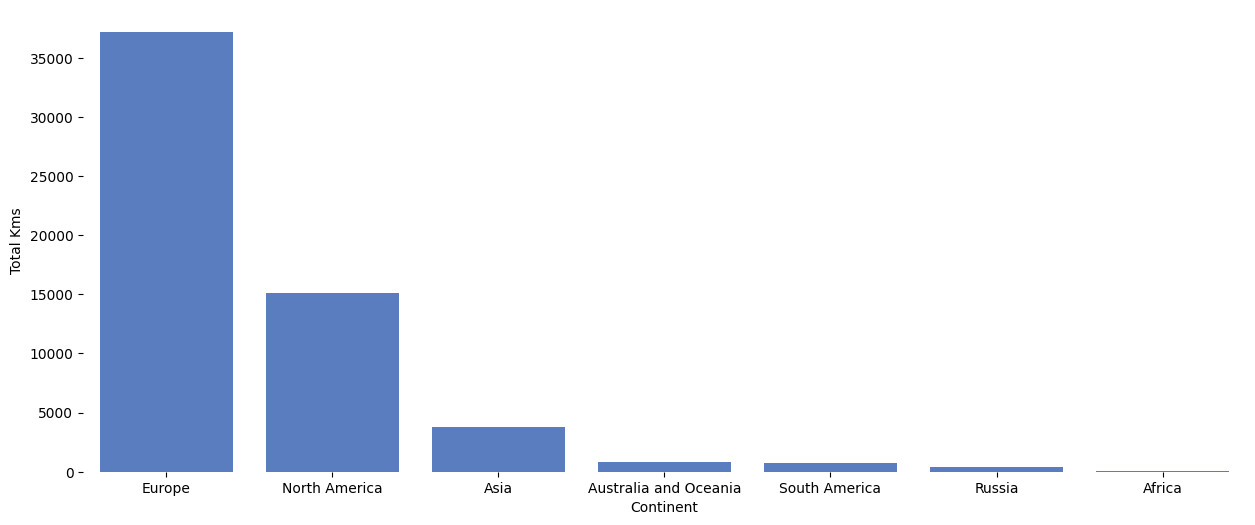

In [152]:
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Continent", y="Easy", data=kmsby_continent,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Continent", y="Total Kms", data=kmsby_continent,
            label="High gdp", color="b")
sns.despine(left=True, bottom=True)

    ## Sacar porcentaje de Kms skiables por Country 

----


In [315]:
df1 = pd.read_csv('skiresort_EU.csv', index_col = 'Unnamed: 0').reset_index(drop=True)

,Resort Name,Continent,Country,State/Province,Ski Resort Rate,Altitude,Easy,Intermediate,Difficult,Kms,Adult,Freeride,Freeride Kms,Ski resort size,Slope offering,Lifts and gondolas,Snow reliability,On-site parking,Trail maps and signs,Cleanliness and hygiene,Environmentally friendly ski operation,Restaurants and Gastronomy,Apres-ski,Families and children,Beginners,Snow parks,Cross-Country
0,KitzSki – Kitzbühel/Kirchberg,Europe,Austria,Tyrol (Tirol),4.9,2000.0,101.0,61.0,17.0,179.0,55.0,5.0,45.0,5.0,5.0,5.0,5.00,4.00,5.00,5.00,4.00,5.00,4.00,5.00,5.00,5.00,5.00
1,Ischgl/Samnaun – Silvretta Arena,Europe,Austria,Tyrol (Tirol),4.8,2872.0,47.0,142.0,49.0,238.0,53.0,5.0,15.0,5.0,5.0,5.0,5.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00
2,SkiWelt Wilder Kaiser-Brixental,Europe,Austria,Tyrol (Tirol),4.8,1957.0,122.0,129.0,33.0,284.0,49.0,5.0,26.0,5.0,5.0,5.0,4.00,5.00,4.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00
3,St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth...,Europe,Austria,Tyrol (Tirol),4.8,2811.0,132.0,123.0,50.0,305.0,53.0,5.0,200.0,5.0,5.0,5.0,5.00,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,4.00,4.00
4,Serfaus-Fiss-Ladis,Europe,Austria,Tyrol (Tirol),4.8,2820.0,47.0,123.0,28.0,198.0,51.0,5.0,28.0,5.0,5.0,5.0,5.00,4.00,5.00,4.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,zugerberg,Europe,Switzerland,Central Switzerland,1.0,940.0,0.2,0.0,0.0,0.2,5.0,NaN,NaN,1.0,1.0,2.5,2.02,1.99,1.94,1.71,1.48,2.06,1.60,1.41,2.00,2.25,1.71
2488,zum-zeri-passo-dei-due-santi,Europe,Italy,Tuscany (Toscana),1.9,1588.0,1.5,5.3,1.2,8.0,25.0,NaN,NaN,1.9,2.2,2.7,2.23,2.02,2.18,2.20,2.10,1.88,2.09,1.45,1.64,1.90,1.38
2489,zvicina,Europe,Czech Republic,Hradec Kralove Region (Kralovehradecky kraj),1.3,710.0,1.5,0.7,0.0,2.2,12.6,NaN,NaN,1.3,1.3,1.5,2.04,1.71,1.41,1.80,2.01,2.07,2.00,1.93,1.91,2.02,1.67
2490,zwoelferhorn-st-gilgen,Europe,Austria,Salzburg (Salzburger Land),2.0,1522.0,1.0,5.0,1.0,7.0,30.0,NaN,NaN,2.0,2.3,3.9,1.94,1.90,2.25,2.27,1.77,2.15,1.95,2.19,2.34,2.30,1.75


In [320]:
# Grouping Ski resort by country
resort_bycountry = ski_EU.groupby('Country')[['Resort Name']].count().sort_values(by='Resort Name', ascending=False)
resort_bycountry = resort_bycountry.rename(columns = {'Resort Name':'Count'})


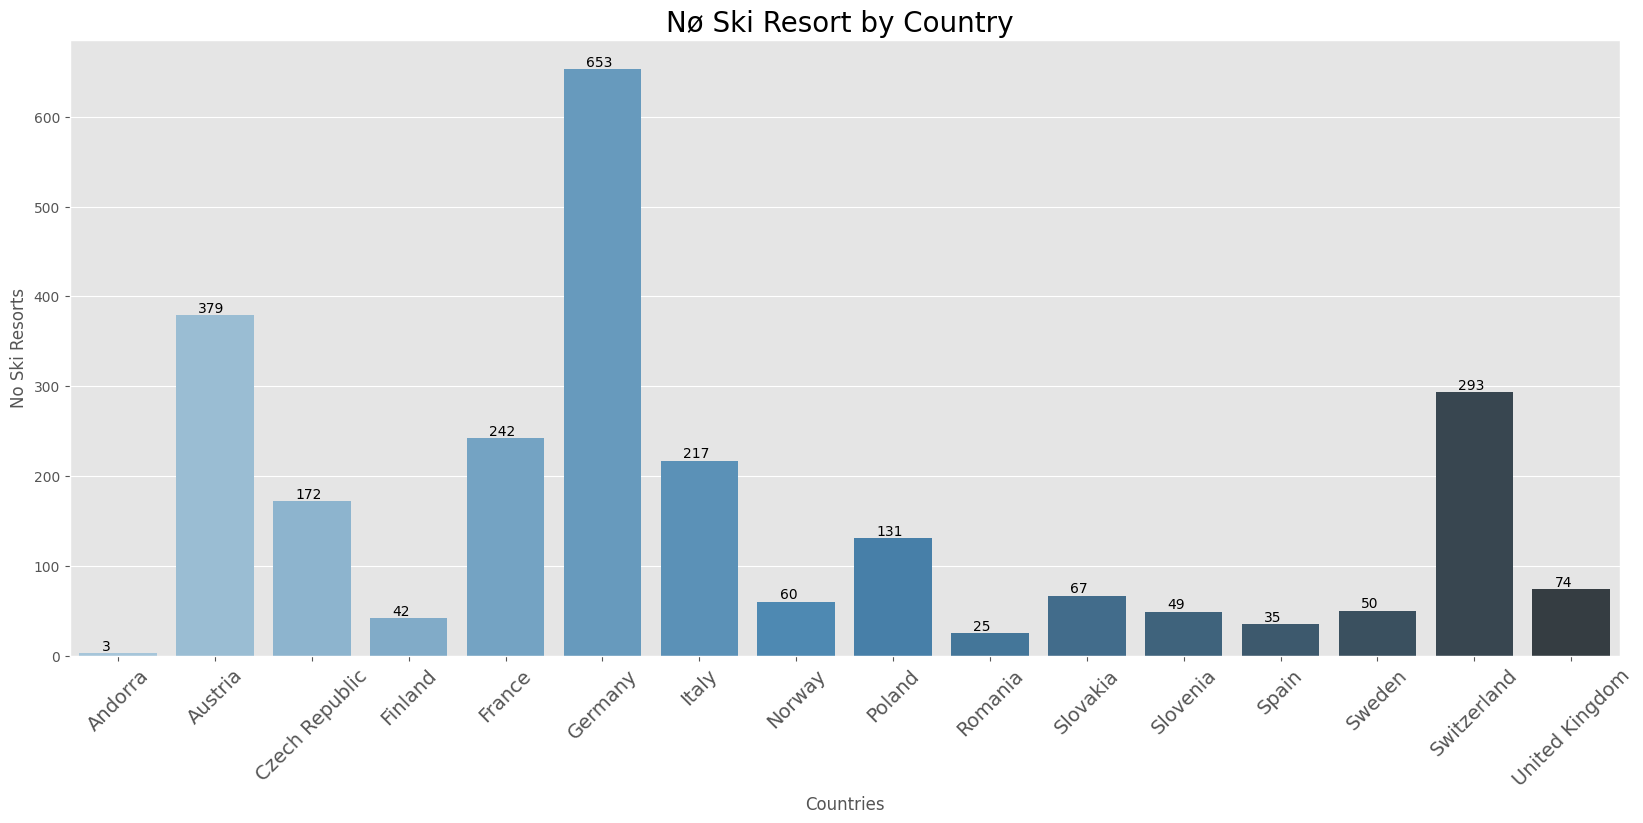

In [318]:
#Show the number of ski resort there are in each Country
style.use('ggplot')
plt.figure(figsize=(20,8))
barplot=sns.barplot(x=resort_bycountry.index,
            y=resort_bycountry['Resort Name'],
            palette="Blues_d",
           errorbar=None);

for bar in barplot.patches:
    # print(bar.get_height())
    altura_b = bar.get_height()
    # print(bar.get_x())
    x_b = bar.get_x()
    # print(bar.get_width())
    w_b = bar.get_width()
    plt.text(x_b + w_b/3.5 , altura_b, int(altura_b), va="bottom")

barplot.set(xlabel='Countries', ylabel='No Ski Resorts');
plt.title('Nø Ski Resort by Country ', fontsize = 20)
plt.xticks(rotation =45, fontsize = 14);



In [328]:
#Lets calculate percent by Country in related with the total
resort_bycountry['Percent'] = round((resort_bycountry['Count']/resort_bycountry['Count'].sum())*100,2)
resort_bycountry

,Count,Percent
Country,,
Germany,653,26.20
Austria,379,15.21
Switzerland,293,11.76
France,242,9.71
Italy,217,8.71
Czech Republic,172,6.90
Poland,131,5.26
United Kingdom,74,2.97
Slovakia,67,2.69


In [268]:
#Aqui hemos el numero de ski resort que hay por pais 

# create trace1 
trace1 = go.Bar(x = resort_bycountry.index,
               y = resort_bycountry['Resort Name'],
               marker = dict(color = colors,
                line = dict(color='rgb(100,0,0)', width = 1)),
                base = 'markers',
               text = resort_bycountry['Resort Name'])





data = [trace1]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

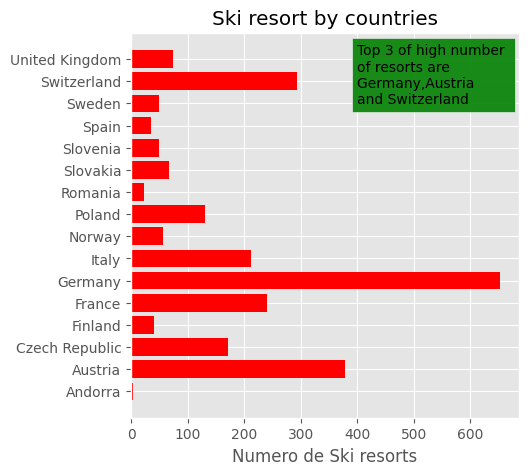

In [13]:
style.use('ggplot')
plt.figure(figsize= (5,5))
plt.barh(number,countries, color = 'red')
plt.xlabel('Numero de Ski resorts')
plt.title('Ski resort by countries')
plt.text(400,13,'Top 3 of high number \nof resorts are \nGermany,Austria \nand Switzerland', bbox=dict(facecolor='green', alpha=0.9));

In [106]:
#Aqui sacamos la correlacion entre los valores numericos que tenemos 
Corr = ski_EU.corr()[['Ski Resort Rate','Altitude', 'Easy', 'Intermediate ','Difficult'  
       ,'Adult', 'Freeride', 'Freeride Kms', 'Ski resort size',
       'Slope offering','Restaurants and Gastronomy',
       'Apres-ski', 'Families and children', 'Beginners', 'Snow parks',
       'Cross-Country','Snow reliability']].round(2)

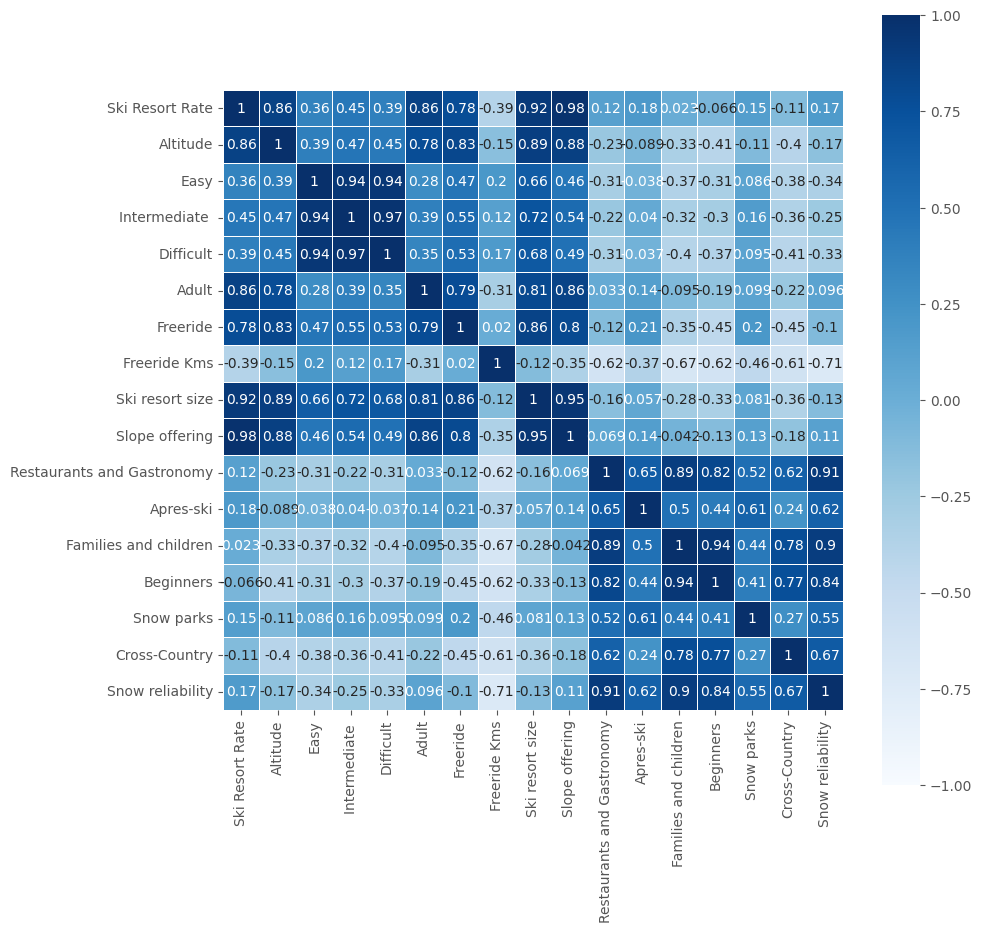

In [107]:
#Demostramos la correlacion que hay entre los valores numericos.
plt.figure(figsize=(10,10))
sns.heatmap(Corr.corr(),vmin=-1, vmax=1, center=0,
            cmap= sns.color_palette("Blues", as_cmap=True),
            square=True, linewidths=.5, annot=True);


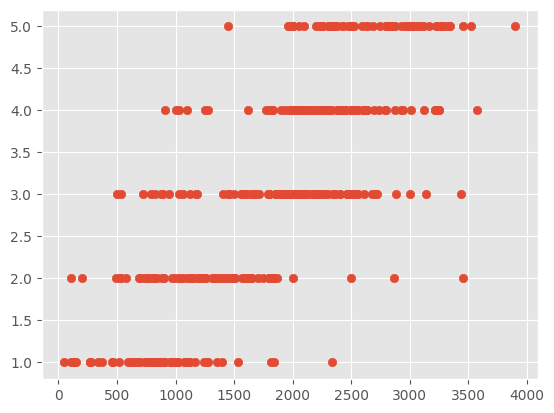

In [160]:
plt.scatter(ski_EU['Altitude'], ski_EU['Freeride'])

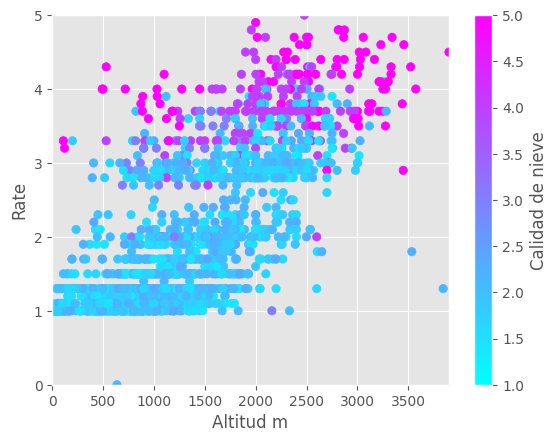

In [110]:
quality = ski_EU.loc[:,['Altitude','Ski Resort Rate','Snow reliability']]
plt.scatter(x = quality['Altitude'], y = quality['Ski Resort Rate'], c=quality['Snow reliability'], cmap='cool')

plt.xlabel('Altitud m')
plt.ylabel('Rate')
plt.xlim(min(quality['Altitude']), max(quality['Altitude']))
plt.ylim(min(quality['Ski Resort Rate']), max(quality['Ski Resort Rate']))

plt.colorbar(label='Calidad de nieve')

plt.show()



In [ ]:



# Create the scatter plot
plt.scatter(x=ski_resorts['altitud'], y=ski_resorts['rate'],
            c=ski_resorts['calidad_nieve'], cmap='cool')

# Set the labels and limits
plt.xlabel('Altitud (m)')
plt.ylabel('Rate')
plt.xlim(min(ski_resorts['altitud']), max(ski_resorts['altitud']))
plt.ylim(min(ski_resorts['rate']), max(ski_resorts['rate']))

# Add colorbar
plt.colorbar(label='Calidad de nieve')

# Show the plot
plt.show()

<AxesSubplot:>

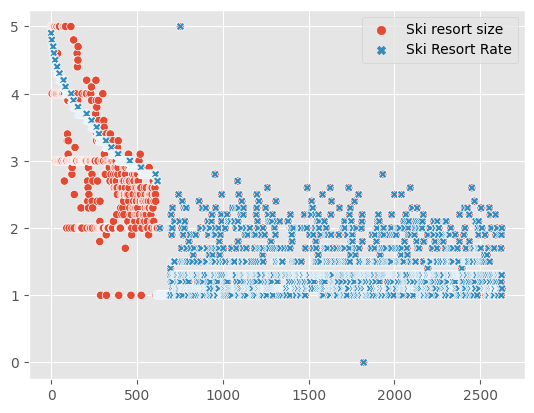

In [112]:
sns.scatterplot([ski_EU['Ski resort size'],ski_EU['Ski Resort Rate']])


In [113]:
#Aqui he sacado la suma de Kilometros para Expertos que hay en cada Pais y Kms de freeride
Expert = ski_EU.groupby('Country')['Difficult','Freeride Kms'].sum().copy()
Expert['Total'] = Expert.apply(lambda row:row[0:2].sum(),axis=1)
Expert.sort_values(by='Total',ascending=False)

/Users/migueldefrutos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Difficult,Freeride Kms,Total
Country,,,
Austria,827.7,613.5,1441.2
France,1118.8,70.0,1188.8
Switzerland,956.1,159.5,1115.6
Italy,751.7,24.2,775.9
Germany,130.9,45.7,176.6
Spain,144.9,5.0,149.9
Norway,133.8,3.7,137.5
Sweden,99.8,0.0,99.8
Andorra,44.0,0.0,44.0


In [43]:
#Aqui he sacado las variables que voy a meter en el grafico 
ciudades =list(Expert.index)
print(ciudades)
pista_dificil = list(Expert['Difficult'])
print(pista_dificil)
km_free = list(Expert['Freeride Kms'])
print(km_free)

['Andorra', 'Austria', 'Czech Republic', 'Finland', 'France', 'Germany', 'Italy', 'Norway', 'Poland', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']
[44.0, 827.7, 35.3, 33.6, 1103.8, 130.9, 730.4, 116.3, 19.400000000000002, 31.9, 32.8, 32.6, 144.9, 97.8, 956.1, 18.9]
[0.0, 613.5, 0.0, 6.2, 70.0, 45.7, 24.2, 3.7, 0.0, 0.0, 5.6, 0.0, 5.0, 0.0, 159.5, 0.0]


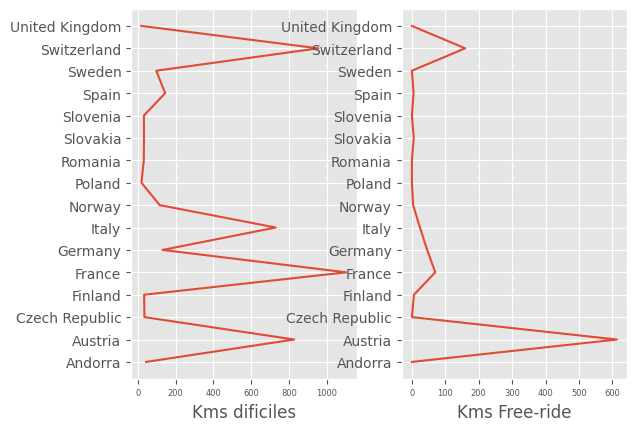

In [45]:
# Grafico que nos hace ver el numero de kms que hay por pista y por freeride por pais.
fig,ax = plt.subplots()
ax2  = ax.twinx()
# Plot pista dificil 
x = ciudades
y1 = pista_dificil
c = ['red','yellow','green','black']
plt.subplot(1,2,1)
ax = plt.plot(y1,x)
plt.xlabel('Kms dificiles')
plt.tick_params('x',labelsize= 6);

#Plot Kms Free-ride
x = ciudades
y2 = km_free
plt.subplot(1,2,2)
ax2 = plt.plot(y2,x)
plt.xlabel('Kms Free-ride')
plt.tick_params('x',labelsize= 6);





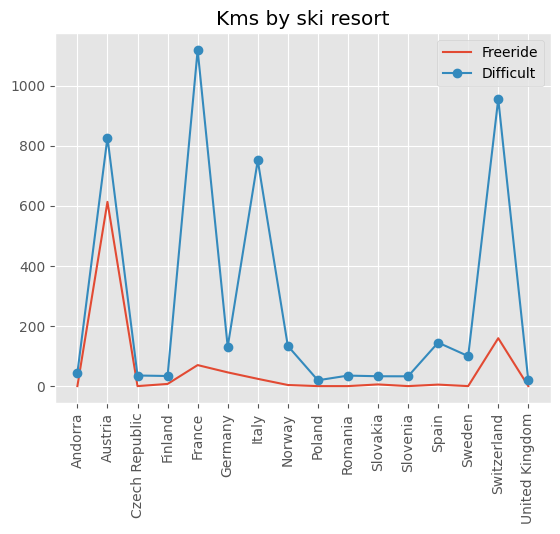

In [150]:
#Sumar todos los km free y dificiles en un mismo grafico
plt.plot(Expert.index, Expert['Freeride Kms'], label='Freeride')
plt.plot(Expert.index, Expert['Difficult'], label='Difficult', marker = 'o')
plt.title('Kms by ski resort')
plt.xticks(rotation = 90)
plt.legend();


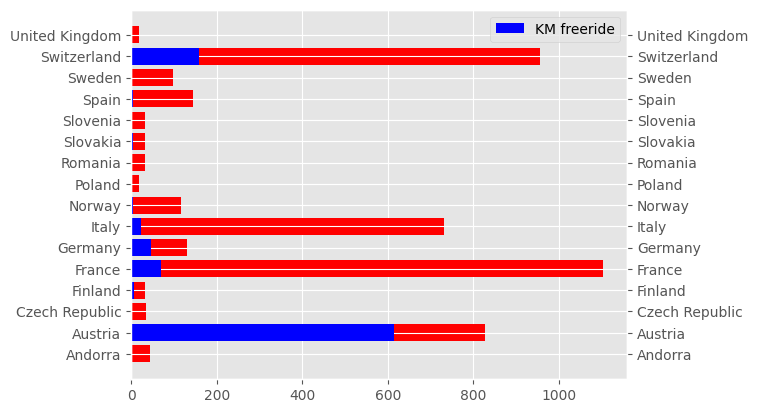

In [55]:
#Aqui lo que hago es utilizar un mismo grafico para los dos
fig,ax = plt.subplots()
ax2  = ax.twinx()

ax.barh(x,y1, color='red',label = 'Pista Dificil')
ax2.barh(x,y2, color='blue',label= 'KM freeride')
plt.legend()

plt.show()



In [173]:
#Aqui vamos a relacionar los paises con la altitud de las montañas y sus km freeride, si van en relacion con la altitud
Altitude = ski_EU.groupby('Country')['Altitude'].mean().round(2)
Related_high = pd.concat([Altitude,Expert], axis=1)
Related_high.sort_values(by='Altitude',ascending=False)

,Altitude,Difficult,Freeride Kms,Total
Country,,,,
Andorra,2608.33,44.0,12.34,56.34
Spain,2152.11,144.9,95.20,240.10
Italy,1980.38,730.4,543.58,1273.98
France,1825.42,1103.8,578.46,1682.26
Switzerland,1683.71,956.1,616.51,1572.61
Austria,1491.72,827.7,835.94,1663.64
Romania,1284.00,31.9,46.44,78.34
Slovenia,1040.00,32.6,84.18,116.78
Slovakia,1015.30,32.8,117.55,150.35


In [174]:
#ski_EU.groupby('Country').Altitude.mean().plot(style = '.-');

In [175]:
#Relacionar el numero de kms con el precio 

Price = ski_EU.groupby('Resort Name')['Country','Kms','Adult'].max().sort_values(by='Adult',ascending=False)
Price.drop(Price[Price['Adult']<1].index, inplace=True)
Price['p/km'] = Price['Adult']/Price['Kms']

/Users/migueldefrutos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
Price.sort_values(by='p/km').round(2)

,Country,Kms,Adult,p/km
Resort Name,,,,
Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry,Switzerland,580.0,52.00,0.09
Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel,France,600.0,61.00,0.10
Via Lattea – Sestriere/Sauze d’Oulx/San Sicario/Claviere/Montgenèvre,Italy,400.0,48.00,0.12
Les Sybelles – Le Corbier/La Toussuire/Les Bottières/St Colomban des Villards/St Sorlin/St Jean d’Arves,France,310.5,44.20,0.14
SkiWelt Wilder Kaiser-Brixental,Austria,284.0,49.00,0.17
...,...,...,...,...
bowles-snowsports-centre,United Kingdom,0.1,36.16,361.60
tamworth-snowdome,United Kingdom,0.2,77.97,389.85
chelski-london,United Kingdom,0.1,45.14,451.40


In [ ]:
plt.figure(figsize=(10,8))

In [177]:
#He importado el data de las avalanchas
avalanches = pd.read_csv('/Users/migueldefrutos/Documents/Bootcamp/Data_Bridge /Alumno /ds_thebridge_11_22/Entregas/EDA/WEBScrapping/Avalanchas/Europa/europe_avalanches_fatilities.csv', index_col='Unnamed: 0')
avalanches.head()

,Location,Country,1oHazard,2oHazard,Dead,Party,Sport,Year,Month
0,Hohe Warte,Austria,Persistent weak layer,NaN,1,10,Backcountry skiing,2018,March
1,Hinterbergkofel,Austria,Persistent weak layer,Wind slab,1,16,Backcountry skiing,2018,March
2,Hochkarspitze,Austria,Persistent weak layer,NaN,1,3,Backcountry skiing,2018,February
3,Kals - Matreier Törl,Austria,Wind slab,Persistent weak layer,2,2,Off-piste skiing,2018,January
4,Velilltal,Austria,Wind slab,New snow,1,3,Off-piste skiing,2018,January


In [178]:
avalanches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  305 non-null    object
 1   Country   312 non-null    object
 2   1oHazard  221 non-null    object
 3   2oHazard  151 non-null    object
 4   Dead      314 non-null    int64 
 5   Party     314 non-null    int64 
 6   Sport     265 non-null    object
 7   Year      314 non-null    int64 
 8   Month     314 non-null    object
dtypes: int64(3), object(6)
memory usage: 24.5+ KB


In [179]:
avalanches = avalanches.replace({'Czechia':'Czech Republic'})

In [180]:
#Unimos los dos dataframe con la altitud
avalanches2 = pd.merge(Altitude,avalanches, on='Country' ,how ='inner')
avalanches2.head()

,Country,Altitude,Location,1oHazard,2oHazard,Dead,Party,Sport,Year,Month
0,Andorra,2608.33,Baser Negre,Wind slab,Wet snow,1,2,Off-piste skiing,2018,March
1,Austria,1491.72,Hohe Warte,Persistent weak layer,NaN,1,10,Backcountry skiing,2018,March
2,Austria,1491.72,Hinterbergkofel,Persistent weak layer,Wind slab,1,16,Backcountry skiing,2018,March
3,Austria,1491.72,Hochkarspitze,Persistent weak layer,NaN,1,3,Backcountry skiing,2018,February
4,Austria,1491.72,Kals - Matreier Törl,Wind slab,Persistent weak layer,2,2,Off-piste skiing,2018,January


In [181]:
#Convertimos a string la columna year
avalanches2['Year'] = avalanches2['Year'].astype(str)
avalanches2['Dead'] = avalanches2['Dead'].astype(int)
avalanches2['Party'] = avalanches2['Party'].astype(int)
avalanches2['Altitude'] = avalanches2['Altitude'].astype(int)


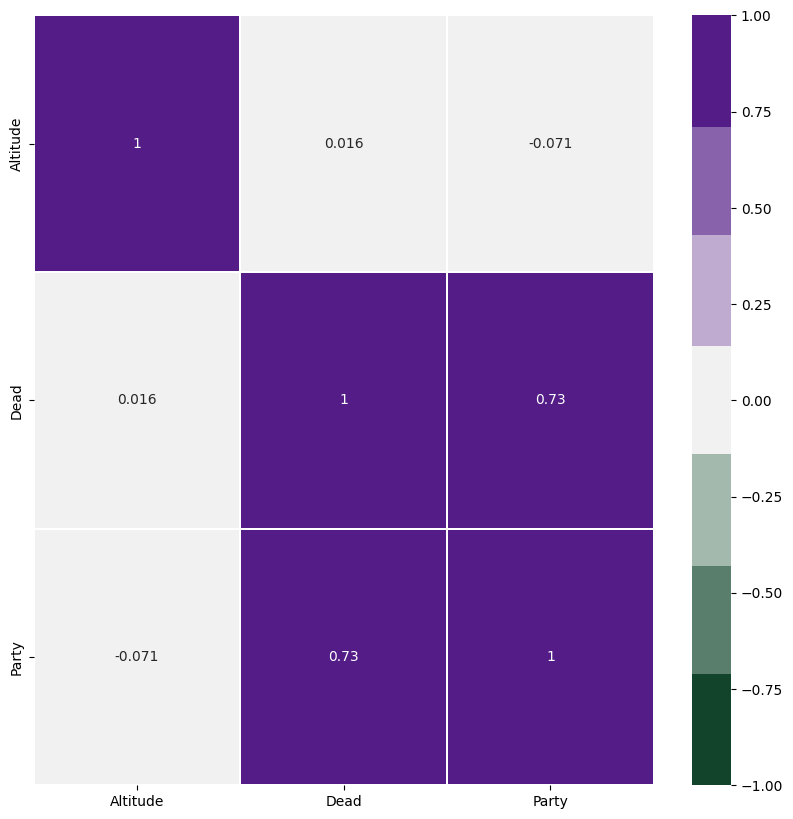

In [182]:
plt.figure(figsize=(10,10))
sns.heatmap(avalanches2.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
             linewidths=.100, annot=True);

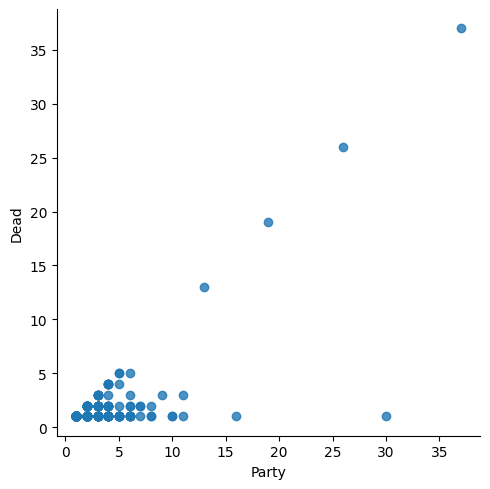

In [279]:
sns.lmplot(x="Party", y="Dead", data=avalanches2, fit_reg=False);

In [ ]:
#Numero de avalanchas que hay haciendo los diferentes deportes mencionados
avalanches2.groupby('Country')['Sport'].value_counts()

Country         Sport                        
Andorra         Off-piste skiing                  1
Austria         Backcountry skiing               24
                Off-piste skiing                 14
                Mountaineering/Climbing           7
                Hiking on foot or snowshoeing     3
                Other                             2
                Travelling on road                1
Czech Republic  Backcountry skiing                2
France          Backcountry skiing               33
                Off-piste skiing                  8
                Mountaineering/Climbing           6
                Other                             4
Germany         Backcountry skiing                6
                Mountaineering/Climbing           2
Iceland         Backcountry skiing                2
Italy           Off-piste skiing                 47
                Backcountry skiing               13
                Mountaineering/Climbing           9
                On

In [ ]:
#el numero de muertes que hay por año 
avalanches2.groupby(['Country','Year'])['Dead'].sum()

Country         Year  
Andorra         2018.0     1.0
Austria         2017.0     3.0
                2018.0     9.0
                2019.0    24.0
                2020.0    11.0
                2021.0    16.0
                2022.0    14.0
Czech Republic  2021.0     2.0
France          2018.0    37.0
                2019.0    14.0
                2020.0    12.0
                2021.0    39.0
                2022.0    16.0
Germany         2017.0     1.0
                2018.0     1.0
                2019.0     3.0
                2022.0     4.0
Iceland         2020.0     1.0
                2022.0     1.0
Italy           2017.0     2.0
                2018.0    43.0
                2019.0    25.0
                2020.0     2.0
                2021.0    28.0
                2022.0     9.0
Norway          2018.0     6.0
                2019.0    13.0
                2020.0     4.0
                2021.0     8.0
                2022.0     5.0
Poland          2022.0     4.0
Romania         

In [344]:
#Cuantas avalanchas ha habido en el trasncurso de los años
avalanches2.groupby('Year')['Year'].count()

Year
2017     8
2018    56
2019    57
2020    35
2021    98
2022    56
Name: Year, dtype: int64

In [ ]:
avalanches2.groupby('Country')['Dead'].count()

Country
Andorra            1
Austria           54
Czech Republic     2
Finland            0
France            53
Germany            8
Iceland            2
Italy             82
Norway            24
Poland             4
Romania            9
Slovakia           8
Slovenia           3
Spain              7
Sweden             0
Switzerland       54
United Kingdom     1
Name: Dead, dtype: int64

In [269]:
#Creo un acolumna para determinar segun el dataframe que probabilidad de muerte dependiendo de cuanta gente sean 
avalanches2['Prob/Died'] = avalanches2['Dead']/avalanches2['Party']

In [271]:
#Que probabilidad hay de morir si va mas de una persona y hay una avalancha 
greater_dob = avalanches2[avalanches2['Party'] > 1]
greater_dob['Prob/Died'].mean()

0.5511300778346233

In [272]:
#que probabilidad hay de moriri si hay una avalancha y va solo una persona 
lower_dob = avalanches2[avalanches2['Party'] == 1]
lower_dob['Prob/Died'].mean()

1.0

In [298]:
#avalanches2.to_csv('avalanchas_EU.csv')